# MODELING - Regression 22/01

In [1]:

import numpy as np 
import pandas as pd 

import statsmodels.api as sm
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn import metrics 
import xgboost as xgb




C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## Load Dataset

In [2]:
df = pd.read_csv('Data/DC_Prop_Condominium_Regression.csv', index_col= 'Unnamed: 0')
df.shape

(38707, 36)

Mendapatkan HARGA yang tidak diketahui ke DataFrame yang berbeda untuk prediksi

## Menentukan Feature dan Target

In [3]:
X=df.drop(['PRICE'],axis=1)
y=df['PRICE']

## Regresi untuk setiap model

In [4]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    print('Model Performance')
    print('R2:', metrics.r2_score(y_test, predictions))
    print('Mean_Absolute_Error:', metrics.mean_absolute_error(y_test, predictions))
    print('Mean_Squared_Error:', metrics.mean_squared_error(y_test, predictions))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

## Without Drop

### OLS Regression

In [5]:
#split into Test and Train
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 100)
model = sm.OLS(y_train, X_train.astype(float)).fit()

# Print out the statistics
# evaluate Accuracy
evaluate(model, X_test, y_test)
model.summary()

Model Performance
R2: 0.41364062269202084
Mean_Absolute_Error: 7.840637450173524
Mean_Squared_Error: 188.85999613547537
RMSE: 13.74263425022566


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  PRICE   R-squared (uncentered):                   0.967
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                          3.475e+04
Date:                Mon, 07 Feb 2022   Prob (F-statistic):                        0.00
Time:                        00:46:39   Log-Likelihood:                     -1.2455e+05
No. Observations:               30965   AIC:                                  2.492e+05
Df Residuals:                   30939   BIC:                                  2.494e+05
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
BATHRM                  3.5317      0.231     15.298      0.000       3.079       3.984
HF_BATHRM              -0.3948      0.252     -1.565      0.118      -0.889       0.100
ROOMS                  -1.1566      0.145     -7.982      0.000      -1.441      -0.873
BEDRM                   1.3419      0.209      6.411      0.000       0.932       1.752
AYB                     0.0366      0.004     10.276      0.000       0.030       0.044
YR_RMDL                -0.0374      0.004     -8.694      0.000      -0.046      -0.029
EYB                     0.0971      0.005     21.081      0.000       0.088       0.106
SALE_NUM                1.7349      0.060     28.901      0.000       1.617       1.853
FIREPLACES             -0.0087      0.015     -0.595      0.552      -0.037       0.020
USECODE                -5.2007      0.214    -24.286      0.000      -5.620      -4.781
LANDAREA               -0.0098      0.000    -37.982      0.000      -0.010      -0.009
LIVING_GBA              0.0245      0.000     59.321      0.000       0.024       0.025
SalevYB                 0.0808      0.004     18.790      0.000       0.072       0.089
SalevYI                 0.0204      0.004      5.593      0.000       0.013       0.028
HEAT_Air-Oil        -3.631e-14   3.46e-15    -10.484      0.000   -4.31e-14   -2.95e-14
HEAT_Elec Base Brd  -8.434e-15   1.07e-15     -7.893      0.000   -1.05e-14   -6.34e-15
HEAT_Electric Rad    4.165e-14   3.97e-15     10.479      0.000    3.39e-14    4.94e-14
HEAT_Evp Cool        5.633e-14   5.15e-15     10.945      0.000    4.62e-14    6.64e-14
HEAT_Forced Air       -58.0957      5.453    -10.653      0.000     -68.784     -47.407
HEAT_Gravity Furnac -2.603e-14   2.42e-15    -10.744      0.000   -3.08e-14   -2.13e-14
HEAT_Hot Water Rad    -58.0429      5.472    -10.608      0.000     -68.767     -47.318
HEAT_Ht Pump          -55.8025      5.454    -10.232      0.000     -66.492     -45.113
HEAT_Ind Unit        -1.56e-13   1.45e-14    -10.734      0.000   -1.84e-13   -1.27e-13
HEAT_Wall Furnace    2.401e-13   2.24e-14     10.717      0.000    1.96e-13    2.84e-13
HEAT_Warm Cool        -61.2762      5.456    -11.232      0.000     -71.969     -50.583
HEAT_Water Base Brd  -9.83e-14   9.16e-15    -10.735      0.000   -1.16e-13   -8.04e-14
AC_1                    3.3594      0.422      7.955      0.000       2.532       4.187
QUALIFIED_U             1.2040      0.184      6.553      0.000       0.844       1.564
WARD_Ward 2            -0.2424      0.238     -1.018      0.309      -0.709       0.224
WARD_Ward 3            -3.4083      0.283    -12.062      0.000      -3.962      -2.854
WARD_Ward 4            -7.6167      0.430    -17.714      0.000      -8.459     

### DecisionTreeRegressor

In [8]:
from sklearn.tree import DecisionTreeRegressor

param_dist = {'max_depth': [1,20]}

DTR = DecisionTreeRegressor()
DTR_cv = GridSearchCV(DTR, param_dist)
DTR_cv.fit(X_train, y_train)
evaluate(DTR_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.7483213045910756
Mean_Absolute_Error: 4.611664283641891
Mean_Squared_Error: 81.0629782379096
RMSE: 9.003498111173768


In [9]:
print(DTR_cv.best_estimator_)

DecisionTreeRegressor(max_depth=20)


### RandomForestRegressor

In [6]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist, scoring='neg_mean_absolute_error')
RFR_cv.fit(X_train, y_train)

# RESULT
evaluate(RFR_cv.best_estimator_, X_test, y_test)

In [ ]:
RFR_cv.best_estimator_

RandomForestRegressor(max_depth=20, n_estimators=366)

### Adaptive Boosting Decision Tree

In [12]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist, scoring='neg_mean_absolute_error')
ada_cv.fit(X_train, y_train)

evaluate(ada_cv.best_estimator_, X_test, y_test)

Model Performance
R2: 0.8571435659395847
Mean_Absolute_Error: 3.870836556904259
Mean_Squared_Error: 46.01250807728949
RMSE: 6.783252028141774


In [13]:
#Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x11850BB5F40),
                  n_estimators=100,
                  random_state=RandomState(MT19937) at 0x11850BB6040)


### XGBRegressor

In [20]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [13]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train,y_train)
evaluate(xg_reg, X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model Performance
R2: 0.8763561115793718
Mean_Absolute_Error: 3.8557271669143898
Mean_Squared_Error: 39.824355494241416
RMSE: 6.310654125702138


### KNN

In [7]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()
KNR_cv = RandomizedSearchCV(KNR, param_dist, cv=5)
KNR_cv.fit(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.7094140795988616
Mean_Absolute_Error: 5.69759357336533
Mean_Squared_Error: 93.59457344391947
RMSE: 9.674428843291963


In [8]:
KNR_cv.best_estimator_

KNeighborsRegressor(n_neighbors=7, weights='distance')

### SVR

In [17]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

evaluate(svr, X_test, y_test)

Model Performance
R2: 0.31646710622369767
Mean_Absolute_Error: 8.938978775944417
Mean_Squared_Error: 220.15853190535486
RMSE: 14.83774012123662


### Ridge & Lasso

In [18]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed, scoring='neg_mean_absolute_error')
rsearch.fit(X_train, y_train)
evaluate(rsearch, X_test, y_test)

Model Performance
R2: 0.5077450241029385
Mean_Absolute_Error: 6.741963431442311
Mean_Squared_Error: 158.54998903984006
RMSE: 12.591663473895737


In [19]:
print(rsearch.best_estimator_)

Ridge(alpha=0.9942074384219376)


In [20]:
import random
from sklearn.linear_model import Lasso

param_grid = {'alpha': uniform()}
seed=6
model = Lasso()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X_train, y_train)
evaluate(rsearch, X_test, y_test)

Model Performance
R2: 0.4609484683619043
Mean_Absolute_Error: 7.3849519071587855
Mean_Squared_Error: 173.6226521171856
RMSE: 13.176594860478392


In [21]:
print(rsearch.best_estimator_)

Lasso(alpha=0.4903677932571596)


## With Drop Variable

# Demo

In [ ]:
import pickle
filename = 'model_randomForest_c_undrop.sav'
pickle.dump(RFR_cv, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
demo = X_train.head(5)
demo.to_csv('demo.csv')

In [ ]:
demo = pd.read_csv('demo.csv')
demo.drop(['Unnamed: 0'], axis =1, inplace=True)
demo

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,INTWALL_Vinyl Comp,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8
0,3,1,1.0,7,3,1900.0,2009.0,1986,3.0,1,...,0,0,0,1,0,0,0,0,0,0
1,2,0,1.0,6,3,1923.0,2004.0,1964,2.0,1,...,0,0,0,0,0,1,0,0,0,0
2,3,0,1.0,8,4,1920.0,2004.0,1964,2.0,1,...,0,0,0,0,0,1,0,0,0,0
3,2,1,2.0,7,4,1939.0,1950.0,1950,2.0,2,...,0,0,0,0,1,0,0,0,0,0
4,3,1,1.0,7,4,2010.0,2013.0,2013,3.0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
predict= pd.DataFrame(loaded_model.predict(demo))
predict.columns = ['PREDICT_PRICE']
predict['PREDICT_PRICE'] = predict['PREDICT_PRICE']**3
predict

,PREDICT_PRICE
0,901592.724707
1,415670.028386
2,348661.844096
3,911570.310543
4,344606.466561


In [ ]:
result = pd.concat([demo,predict], axis=1)
result

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALE_NUM,...,INTWALL_Vinyl Sheet,INTWALL_Wood Floor,WARD_Ward 2,WARD_Ward 3,WARD_Ward 4,WARD_Ward 5,WARD_Ward 6,WARD_Ward 7,WARD_Ward 8,PREDICT_PRICE
0,3,1,1.0,7,3,1900.0,2009.0,1986,3.0,1,...,0,0,1,0,0,0,0,0,0,901592.724707
1,2,0,1.0,6,3,1923.0,2004.0,1964,2.0,1,...,0,0,0,0,1,0,0,0,0,415670.028386
2,3,0,1.0,8,4,1920.0,2004.0,1964,2.0,1,...,0,0,0,0,1,0,0,0,0,348661.844096
3,2,1,2.0,7,4,1939.0,1950.0,1950,2.0,2,...,0,0,0,1,0,0,0,0,0,911570.310543
4,3,1,1.0,7,4,2010.0,2013.0,2013,3.0,1,...,0,0,0,0,0,0,0,0,1,344606.466561


### OLS/LinearRegression with Drop

In [8]:
reg = LinearRegression().fit(X_test, y_test)
reg.score(X_test, y_test)

0.5097570791774698

In [9]:
drop_res = ['WARD_Ward 2', 'FIREPLACES', 'HEAT_Water Base Brd', 'HF_BATHRM']

#Drop insignificant variables and rerun the ols model
X_train_ols = X_train.drop(drop_res, axis =1)
X_test_ols = X_test.drop(drop_res, axis = 1)
model = sm.OLS(y_train, X_train_ols.astype(float), hasconst=True).fit()

# Print out the statistics
# evaluate Accuracy

evaluate(model, X_test_ols, y_test)
model.summary()

Model Performance
R2: 0.4144239339435287
Mean_Absolute_Error: 7.8337957350136005
Mean_Squared_Error: 188.60770007667975
RMSE: 13.733451863121658


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     1062.
Date:                Fri, 04 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:15:24   Log-Likelihood:            -1.2456e+05
No. Observations:               30965   AIC:                         2.492e+05
Df Residuals:                   30942   BIC:                         2.493e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
BATHRM                  3.5929      0.228     15.747      0.000       3.146       4.040
ROOMS                  -1.1694      0.145     -8.085      0.000      -1.453      -0.886
BEDRM                   1.3788      0.208      6.615      0.000       0.970       1.787
AYB                     0.0363      0.004     10.209      0.000       0.029       0.043
YR_RMDL                -0.0366      0.004     -8.584      0.000      -0.045      -0.028
EYB                     0.0964      0.005     21.002      0.000       0.087       0.105
SALE_NUM                1.7349      0.060     28.902      0.000       1.617       1.853
USECODE                -5.1876      0.210    -24.656      0.000      -5.600      -4.775
LANDAREA               -0.0098      0.000    -38.321      0.000      -0.010      -0.009
LIVING_GBA              0.0243      0.000     62.453      0.000       0.024       0.025
SalevYB                 0.0805      0.004     18.724      0.000       0.072       0.089
SalevYI                 0.0204      0.004      5.589      0.000       0.013       0.027
HEAT_Air-Oil         4.566e-14   4.83e-15      9.448      0.000    3.62e-14    5.51e-14
HEAT_Elec Base Brd   -3.92e-14   4.38e-15     -8.956      0.000   -4.78e-14   -3.06e-14
HEAT_Electric Rad   -3.862e-14   3.52e-15    -10.975      0.000   -4.55e-14   -3.17e-14
HEAT_Evp Cool         7.19e-14   6.13e-15     11.720      0.000    5.99e-14    8.39e-14
HEAT_Forced Air       -58.1227      5.453    -10.659      0.000     -68.810     -47.435
HEAT_Gravity Furnac  3.924e-14   3.63e-15     10.802      0.000    3.21e-14    4.64e-14
HEAT_Hot Water Rad    -58.0609      5.471    -10.612      0.000     -68.785     -47.337
HEAT_Ht Pump          -55.8519      5.453    -10.243      0.000     -66.540     -45.164
HEAT_Ind Unit        2.914e-14   2.72e-15     10.694      0.000    2.38e-14    3.45e-14
HEAT_Wall Furnace    1.217e-13   1.14e-14     10.726      0.000    9.95e-14    1.44e-13
HEAT_Warm Cool        -61.3257      5.455    -11.243      0.000     -72.017     -50.634
AC_1                    3.3200      0.422      7.871      0.000       2.493       4.147
QUALIFIED_U             1.2147      0.184      6.619      0.000       0.855       1.574
WARD_Ward 3            -3.2238      0.244    -13.204      0.000      -3.702      -2.745
WARD_Ward 4            -7.5001      0.416    -18.022      0.000      -8.316      -6.684
WARD_Ward 5            -8.5441      0.351    -24.329      0.000      -9.232      -7.856
WARD_Ward 6            -2.1910      0.227     -9.659      0.000      -2.636      -1.746
WARD_Ward 7           -15.9817      0.466    -34.266      0.000     -16.896     -15.068
WARD_Ward 8           -11.8004      0.447    -26.391      0.000     -12.677     -10.924
==============================================================================
Omnibus:    

### DecisionTreeRegressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
#regressor = DecisionTreeRegressor(max_depth=15)
param_dist = {'max_depth': [1,20]}
#regressor.fit(X_train, y_train)
#regressor.score(X_train, y_train)
DTR = DecisionTreeRegressor()
DTR_cv = GridSearchCV(DTR, param_dist)

DTR_cv.fit(X_train_ols, y_train)
evaluate(DTR_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.7666006403911337
Mean_Absolute_Error: 4.6656443695909005
Mean_Squared_Error: 75.17540242321469
RMSE: 8.670374987462463


In [28]:
print(DTR_cv.best_estimator_)

DecisionTreeRegressor(max_depth=20)


### RandomForestRegressor

In [29]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

# Create the parameter distribution
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [1, 20]}

RFR = RandomForestRegressor()
RFR_cv = RandomizedSearchCV(RFR, param_dist, scoring='neg_mean_absolute_error')
RFR_cv.fit(X_train_ols, y_train)

# RESULT
evaluate(RFR_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.8770198004904058
Mean_Absolute_Error: 3.6472194392616757
Mean_Squared_Error: 39.61058849396163
RMSE: 6.293694343862088


In [30]:
print(RFR_cv.best_estimator_)

RandomForestRegressor(max_depth=20, max_features='sqrt', n_estimators=500)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train_ols, y_train)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

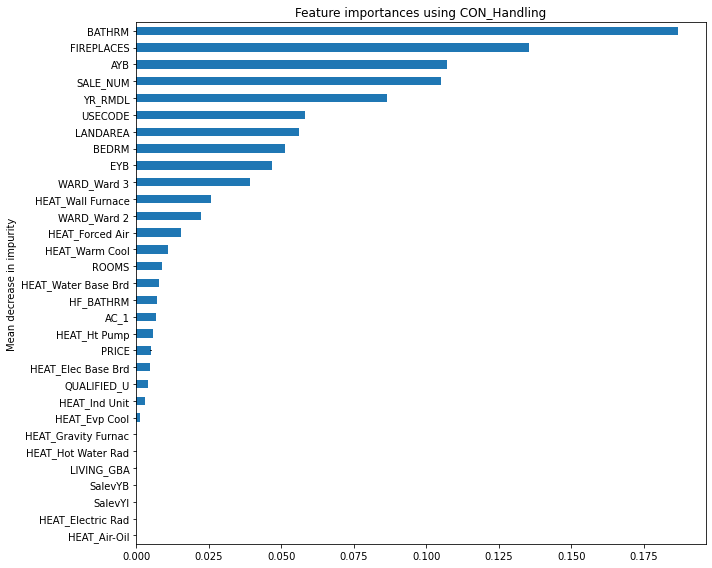

In [12]:
forest_importances = pd.Series(importances, index=df.columns[0:31])
sorted_idx = rf.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,8))
forest_importances.sort_values().plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using CON_Handling")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Adaptive Boosting Decision Tree

In [31]:
rng = np.random.RandomState(1)
param_dist = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]}


ada = AdaBoostRegressor(DecisionTreeRegressor(random_state = rng), random_state = rng)
ada_cv = RandomizedSearchCV(ada, param_dist, scoring='neg_mean_absolute_error')
ada_cv.fit(X_train_ols, y_train)

evaluate(ada_cv.best_estimator_, X_test_ols, y_test)

Model Performance
R2: 0.8589926085911037
Mean_Absolute_Error: 3.8295821908440533
Mean_Squared_Error: 45.416951492821696
RMSE: 6.739210005098646


In [32]:
# Obtaining the best estimators from the model
print(ada_cv.best_estimator_)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(random_state=RandomState(MT19937) at 0x1181015C940),
                  n_estimators=100,
                  random_state=RandomState(MT19937) at 0x1181015C640)


### XGBRegressor

In [14]:
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

In [15]:
xg_reg = xgb.XGBRegressor()
xg_reg.fit(X_train_ols,y_train)
evaluate(xg_reg, X_test_ols, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Model Performance
R2: 0.8735743019426696
Mean_Absolute_Error: 3.972937232250383
Mean_Squared_Error: 40.72034620841608
RMSE: 6.381249580483127


### KNN

In [11]:
from sklearn.neighbors import KNeighborsRegressor


param_dist = {"n_neighbors": [3, 7],
              "weights": ["uniform", "distance"]}

KNR = KNeighborsRegressor()
KNR_cv = RandomizedSearchCV(KNR, param_dist, scoring='neg_mean_absolute_error')

KNR_cv.fit(X_train_ols, y_train)
#KNR.score(X_train, y_train)

evaluate(KNR_cv.best_estimator_, X_test_ols, y_test)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Model Performance
R2: 0.6952341052716416
Mean_Absolute_Error: 5.622740628301968
Mean_Squared_Error: 98.16178938738224
RMSE: 9.90766316481249


In [12]:
print(KNR_cv.best_estimator_)

KNeighborsRegressor(n_neighbors=3, weights='distance')


### SVR

In [16]:
from sklearn.svm import SVR


svr = SVR()
svr.fit(X_train_ols, y_train)
evaluate(svr, X_test_ols, y_test)

Model Performance
R2: 0.3166560474721798
Mean_Absolute_Error: 8.935960175138879
Mean_Squared_Error: 220.0976759783601
RMSE: 14.83568926536142


### Ridge

In [35]:
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


param_grid = {'alpha': uniform()}
seed=6
model = Ridge()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed, scoring='neg_mean_absolute_error')
rsearch.fit(X_train_ols, y_train)
evaluate(rsearch, X_test_ols, y_test)

Model Performance
R2: 0.5069941903407649
Mean_Absolute_Error: 6.766853114286645
Mean_Squared_Error: 158.79182445155212
RMSE: 12.6012628117801


In [36]:
print(rsearch.best_estimator_)

Ridge(alpha=0.9942074384219376)


In [37]:
import random
from sklearn.linear_model import Lasso

param_grid = {'alpha': uniform()}
seed=6
model = Lasso()
kfold = KFold(n_splits=8, random_state=seed, shuffle=True)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, cv=kfold, random_state=seed)
rsearch.fit(X_train_ols, y_train)
evaluate(rsearch, X_test_ols, y_test)

Model Performance
R2: 0.5053963272147999
Mean_Absolute_Error: 6.756872549973598
Mean_Squared_Error: 159.3064788349786
RMSE: 12.621667038667223


In [38]:
print(rsearch.best_estimator_)

Lasso(alpha=0.036608530436010756)
